In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import openweathermapy.core as owm
#import os
#import csv
import seaborn as sns

import datetime as dt
from  scipy.stats import skew, kurtosis, shapiro
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.stattools import adfuller, kpss

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Reference:  https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

In [2]:
file = "../../Data/CSV_Files/Gas_Demand_Tot.csv"
df_demand = pd.read_csv(file, encoding='utf-8')
df_demand = df_demand.drop(['Unnamed: 0'], axis=1)
df_demand["Date"] = pd.to_datetime(df_demand["Date"])
df_demand = df_demand.set_index("Date")
df_demand

,Area,Consumption(Bscf)
Date,,
2019-04-01,U.S.,2182.901
2019-03-01,U.S.,2882.561
2019-02-01,U.S.,2983.892
2019-01-01,U.S.,3379.295
2018-12-01,U.S.,2958.554
2018-11-01,U.S.,2687.995
2018-10-01,U.S.,2276.313
2018-09-01,U.S.,2158.549
2018-08-01,U.S.,2311.370


In [3]:
max(df_demand.index)

Timestamp('2019-04-01 00:00:00')

In [4]:
file = "../../Data/CSV_Files/Gas_Price_HH_M.csv"
df_price = pd.read_csv(file, encoding='utf-8')
df_price["Date"] = pd.to_datetime(df_price["Date"])
df_price = df_price.set_index("Date")
df_price = df_price.sort_index(ascending=1)
df_price = df_price.loc[(df_price.index>=min(df_demand.index)) & (df_price.index<=max(df_demand.index))]
df_price

,Price_HH
Date,
2001-01-01,8.172857
2001-02-01,5.606316
2001-03-01,5.230455
2001-04-01,5.192000
2001-05-01,4.191364
2001-06-01,3.720476
2001-07-01,3.109048
2001-08-01,2.967826
2001-09-01,2.191579


In [5]:
df_price_train = df_price["Price_HH"][:200]
df_price_test = df_price["Price_HH"][200:]
df_price_test

Date
2017-09-01    2.975714
2017-10-01    2.878636
2017-11-01    3.013636
2017-12-01    2.822500
2018-01-01    3.875500
2018-02-01    2.670526
2018-03-01    2.692857
2018-04-01    2.796190
2018-05-01    2.800909
2018-06-01    2.967143
2018-07-01    2.832381
2018-08-01    2.961739
2018-09-01    2.995263
2018-10-01    3.275217
2018-11-01    4.091000
2018-12-01    4.041667
2019-01-01    3.123182
2019-02-01    2.687500
2019-03-01    2.948571
2019-04-01    2.647143
Name: Price_HH, dtype: float64

In [6]:
file = "../../Data/CSV_Files/Temperature_New_York.csv"
df_Temp = pd.read_csv(file, encoding='utf-8')
# df_Temp = df_Temp.drop(['Unnamed: 0'], axis=1)
df_Temp["Date"] = pd.to_datetime(df_Temp["Date"])
df_Temp = df_Temp.set_index("Date")
df_Temp = df_Temp.sort_index(ascending=1)
df_Temp = df_Temp.loc[(df_Temp.index>=min(df_Temp.index)) & (df_Temp.index<=max(df_Temp.index))]
df_Temp

df_Temp_M = df_Temp.resample('MS').mean()

In [7]:
# df = df_demand.merge(df_price, how='outer', left_index=True, right_index=True)

C:\Users\Asterion\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


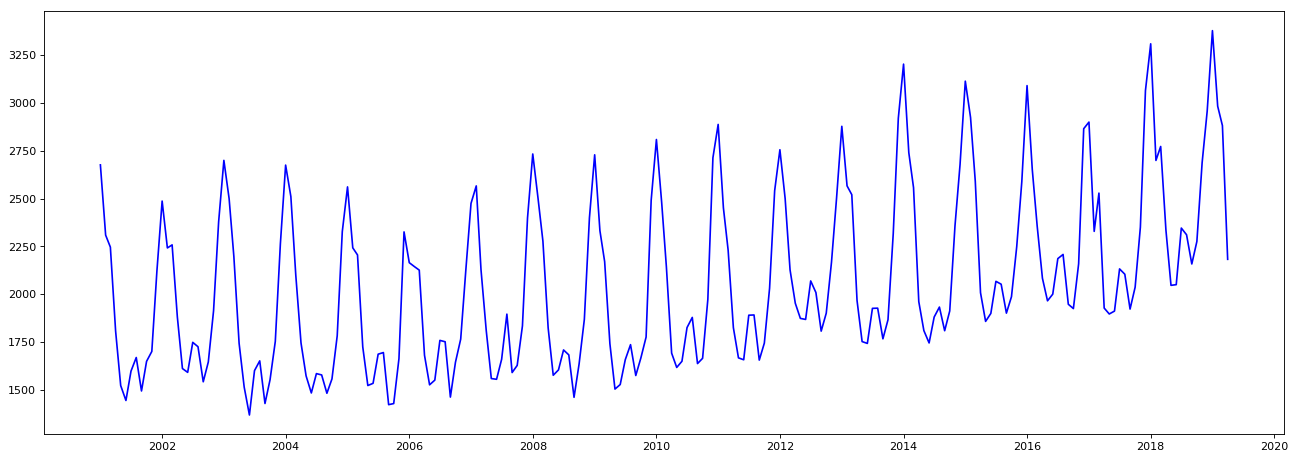

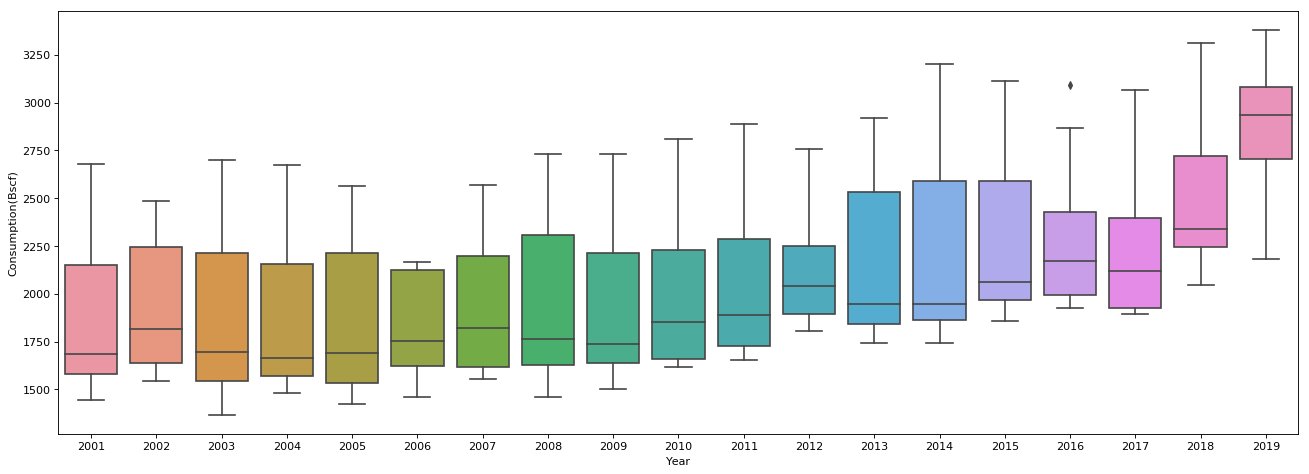

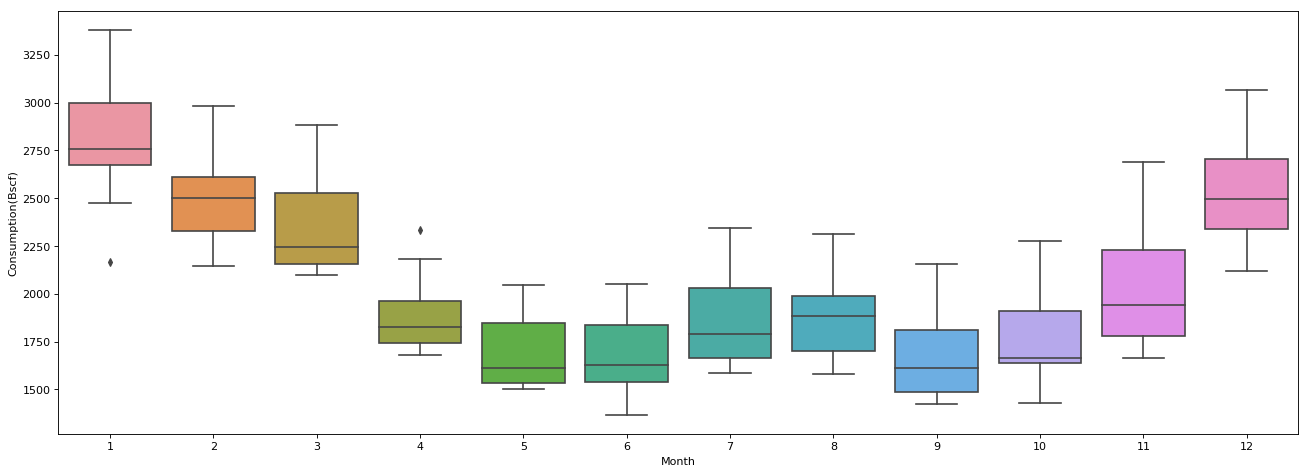

In [8]:
fig, axes = plt.subplots(1, 1, figsize=(20,7), dpi= 80)
plt.plot(df_demand.index,df_demand["Consumption(Bscf)"],c="b")

df_demand["Year"] = df_demand.index.year
fig, axes = plt.subplots(1, 1, figsize=(20,7), dpi= 80)
sns.boxplot(x='Year', y="Consumption(Bscf)", data=df_demand)

df_demand["Month"] = df_demand.index.month
fig, axes = plt.subplots(1, 1, figsize=(20,7), dpi= 80)
sns.boxplot(x='Month', y="Consumption(Bscf)", data=df_demand)

In [9]:
mean = df_demand["Consumption(Bscf)"].mean()
std = df_demand["Consumption(Bscf)"].std()
skew = df_demand["Consumption(Bscf)"].skew()
ex_kurt = df_demand["Consumption(Bscf)"].kurtosis()

print(f"Mean: {mean} \n Std: {std} \n Skew: {skew} \n Kurtosis: {ex_kurt+3}")

Mean: 2059.0168818181814 
 Std: 442.99393249611154 
 Skew: 0.7118853715415384 
 Kurtosis: 2.7540662805723426


- Negative Skewness: Data distribution is not completelly simetric and has a left tail
- Kurtosis below 3: It means that tails are slightly thinner than in a Normal distribution. It is said that the distribution is platykurtic and the chance of finding extreme values is lower than in a normal distribution.

In [10]:
def shapiro_test(data, alpha=0.05):
    stat, pval = shapiro(data)
    print("H0: Data was drawn from a Normal Ditribution")
    if (pval<alpha):
        print("pval {} is lower than significance level: {}, therefore null hypothesis is rejected".format(pval, alpha))
    else:
        print("pval {} is higher than significance level: {}, therefore null hypothesis cannot be rejected".format(pval, alpha))
        
shapiro_test(df_demand["Consumption(Bscf)"], alpha=0.05)

H0: Data was drawn from a Normal Ditribution
pval 1.2110002955978416e-07 is lower than significance level: 0.05, therefore null hypothesis is rejected


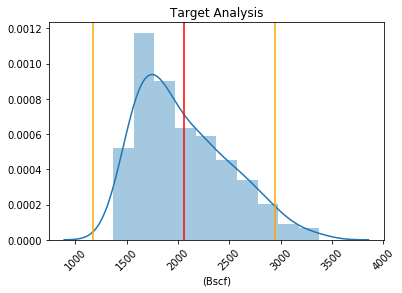

In [11]:
sns.distplot(df_demand["Consumption(Bscf)"])
plt.title("Target Analysis")
plt.xticks(rotation=45)
plt.xlabel("(Bscf)")
plt.axvline(x=mean, color='r', linestyle='-', label="\mu: {0:.2f}%".format(mean))
plt.axvline(x=mean+2*std, color='orange', linestyle='-')
plt.axvline(x=mean-2*std, color='orange', linestyle='-')
plt.show()

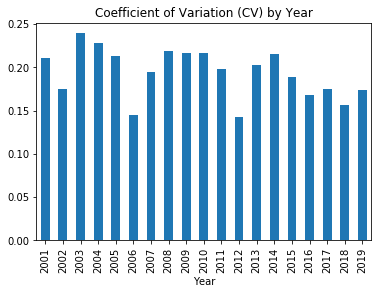

In [12]:
df_demand.groupby("Year")["Consumption(Bscf)"].std().divide(df_demand.groupby("Year")["Consumption(Bscf)"].mean()).plot(kind="bar")
plt.title("Coefficient of Variation (CV) by Year")
plt.show()

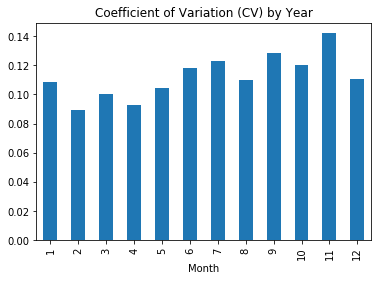

In [13]:
df_demand.groupby("Month")["Consumption(Bscf)"].std().divide(df_demand.groupby("Month")["Consumption(Bscf)"].mean()).plot(kind="bar")
plt.title("Coefficient of Variation (CV) by Year")
plt.show()

# Feature Engineering

The challenge now is to create some features in a very automated way that can deal with seasonality, trend and changes in volatility. The most basic strategy is to use lagged features and rolling window stats, but consider other advanced techniques for further research:
- Momentum and Mean reversion, like RSI in financial markets (https://en.wikipedia.org/wiki/Relative_strength_index)
- Sequence minning

Data is standardized in order to allow application of models that are sensitive to scale, like neural networks or svm. Remember that distribution shape is maintained, it only changes first and second momentum (mean and standard deviation)

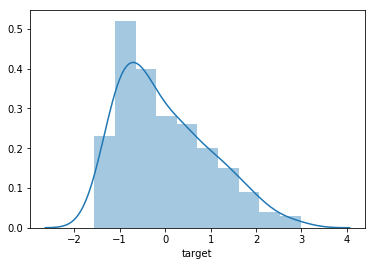

In [14]:
df_demand["target"] = df_demand["Consumption(Bscf)"].add(-mean).div(std)
sns.distplot(df_demand["target"])
plt.show()

In [15]:
features = []
corr_features=[]
targets = []
tau = 4 #forecasting periods

for t in range(1, tau+1):
    df_demand["target_t" + str(t)] = df_demand["target"].shift(-t)
    targets.append("target_t" + str(t))

In [16]:
df_demand

,Area,Consumption(Bscf),Year,Month,target,target_t1,target_t2,target_t3,target_t4
Date,,,,,,,,,
2019-04-01,U.S.,2182.901,2019,4,0.279652,1.859042,2.087783,2.980353,2.030586
2019-03-01,U.S.,2882.561,2019,3,1.859042,2.087783,2.980353,2.030586,1.419835
2019-02-01,U.S.,2983.892,2019,2,2.087783,2.980353,2.030586,1.419835,0.490517
2019-01-01,U.S.,3379.295,2019,1,2.980353,2.030586,1.419835,0.490517,0.224681
2018-12-01,U.S.,2958.554,2018,12,2.030586,1.419835,0.490517,0.224681,0.569654
2018-11-01,U.S.,2687.995,2018,11,1.419835,0.490517,0.224681,0.569654,0.648759
2018-10-01,U.S.,2276.313,2018,10,0.490517,0.224681,0.569654,0.648759,-0.019582
2018-09-01,U.S.,2158.549,2018,9,0.224681,0.569654,0.648759,-0.019582,-0.027655
2018-08-01,U.S.,2311.370,2018,8,0.569654,0.648759,-0.019582,-0.027655,0.625752


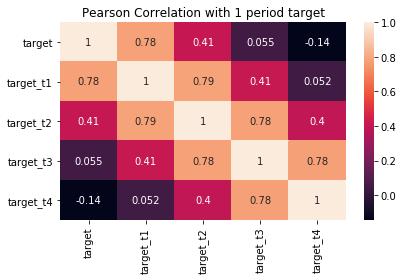

In [17]:
corr_features = ["target","target_t1","target_t2","target_t3","target_t4"]
corr = df_demand[corr_features].corr()

# Plot heatmap of correlation matrix
sns.heatmap(corr, annot=True)
plt.title("Pearson Correlation with 1 period target")
plt.yticks(rotation=0); plt.xticks(rotation=90)  # fix ticklabel directions
plt.tight_layout()  # fits plot area to the plot, "tightly"
plt.show()  # show the plot

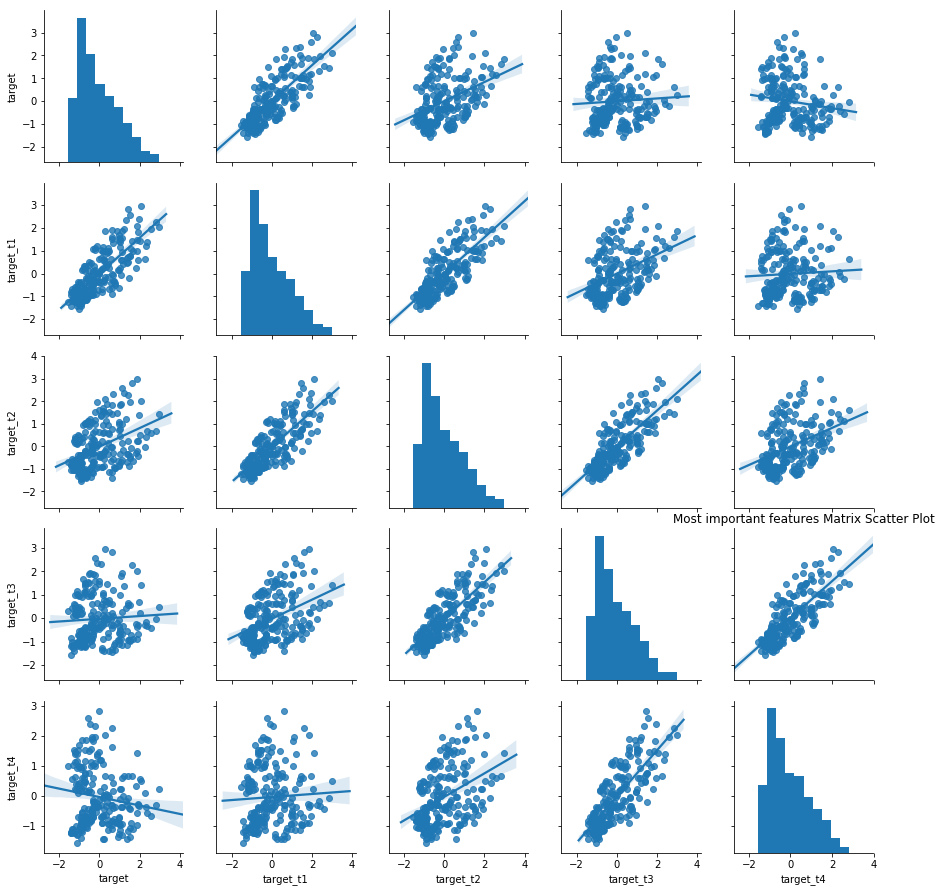

In [18]:
sns.pairplot(data=df_demand[corr_features].dropna(), kind="reg")
plt.title("Most important features Matrix Scatter Plot")
plt.show()

Time series decomposition

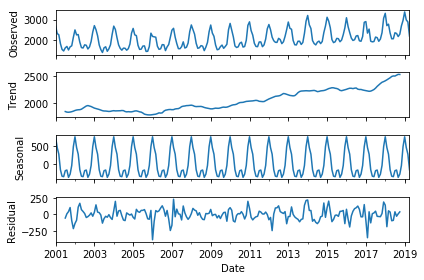

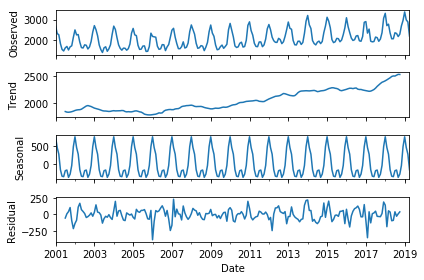

In [19]:
decomposition = seasonal_decompose(df_demand["Consumption(Bscf)"], model = "additive")
decomposition.plot()

In [20]:
trend = pd.DataFrame(decomposition.trend)
trend = trend.dropna()
seasonal = pd.DataFrame(decomposition.seasonal)
seasonal = seasonal.dropna()
residual = pd.DataFrame(decomposition.resid)
residual = residual.dropna()

Testing Stationarity

In [21]:
# ADF Test

def ADF_test(data, alpha=0.05):
    result = adfuller(data, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')

    if result[1] <= 0.05:
        print("The null hypothesis is that the time series is non-stationary. Since p <= 0.05, we reject the null hypotesis")
    else:
        print("The null hypothesis is that the time series is non-stationary. Since p > 0.05, we CAN NOT REJECT the null hypotesis")

    for key, value in result[4].items():
        print('Critial Values:')
        print(f'   {key}, {value}')
    

# KPSS Test
def KPSS_test(data, alpha=0.05):
    result = kpss(data, regression='c')
    print('\nKPSS Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

    if result[1] <= 0.05:
        print("The null hypothesis is that the time series is stationary. Since p <= 0.05, we reject the null hypotesis")
    else:
        print("The null hypothesis is that the time series is stationary. Since p > 0.05, we CAN NOT REJECT the null hypotesis")

    for key, value in result[3].items():
        print('Critial Values:')
        print(f'   {key}, {value}')
    

print("===============================")
data = df_demand["Consumption(Bscf)"]
ADF_test(data, alpha=0.05)
KPSS_test(data, alpha=0.05)
print("===============================")
data = trend["Consumption(Bscf)"] + residual["Consumption(Bscf)"]
ADF_test(data, alpha=0.05)
KPSS_test(data, alpha=0.05)
print("===============================")
data = residual["Consumption(Bscf)"]
ADF_test(data, alpha=0.05)
KPSS_test(data, alpha=0.05)

ADF Statistic: -2.166909593158075
p-value: 0.2184737557586166
The null hypothesis is that the time series is non-stationary. Since p > 0.05, we CAN NOT REJECT the null hypotesis
Critial Values:
   1%, -3.4626576734812318
Critial Values:
   5%, -2.8757444215841326
Critial Values:
   10%, -2.5743412314098753

KPSS Statistic: 1.167840
p-value: 0.010000
The null hypothesis is that the time series is stationary. Since p <= 0.05, we reject the null hypotesis
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739
ADF Statistic: -1.9483878467413003
p-value: 0.3096512229321028
The null hypothesis is that the time series is non-stationary. Since p > 0.05, we CAN NOT REJECT the null hypotesis
Critial Values:
   1%, -3.4648754262570978
Critial Values:
   5%, -2.876714157488788
Critial Values:
   10%, -2.574858699001736

KPSS Statistic: 1.309440
p-value: 0.010000
The null hypothesis is that the time series is stationary. Since p <= 0.0

C:\Users\Asterion\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
C:\Users\Asterion\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
C:\Users\Asterion\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


Autocorrelation and Partial Autocorrelation

If a series is significantly autocorrelated, that means, the previous values of the series (lags) may be helpful in predicting the current value.

Partial Autocorrelation also conveys similar information but it conveys the pure correlation of a series and its lag, excluding the correlation contributions from the intermediate lags.

=================================================================================================================

 The purpose of differencing a time series is to make the time series stationary. The right differencing is the minimum required to get a near-stationary series: defined mean and the ACF plot reaching to zero fairly quickly.
 
 If the autocorrelations are positive for many number of lags (10 or more), then the series needs further differencing. On the other hand, if the lag 1 autocorrelation itself is too negative, then the series is probably over-differenced.
 
 - The autocorrelation (ACF) gives a hint about d

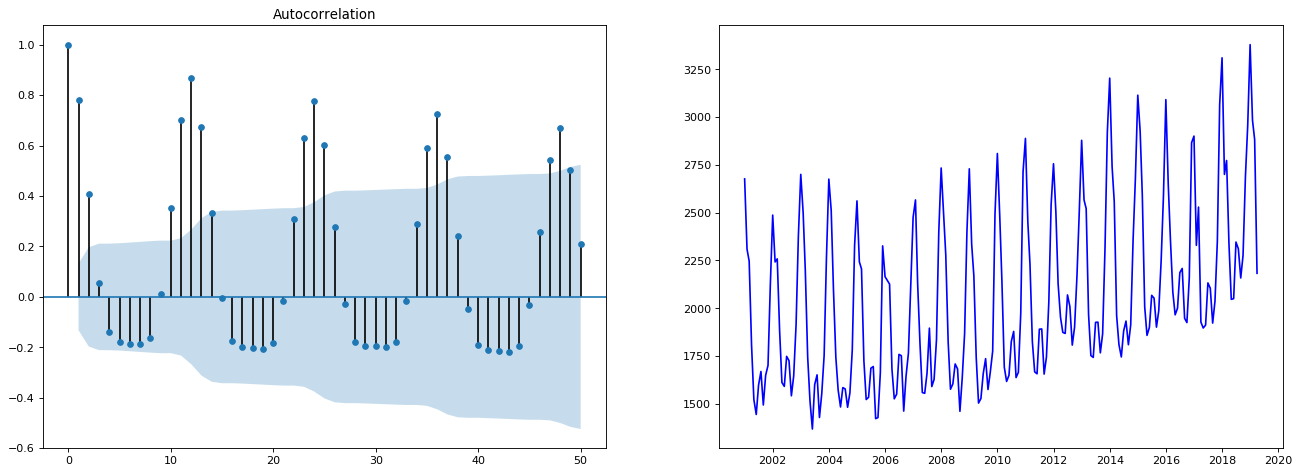

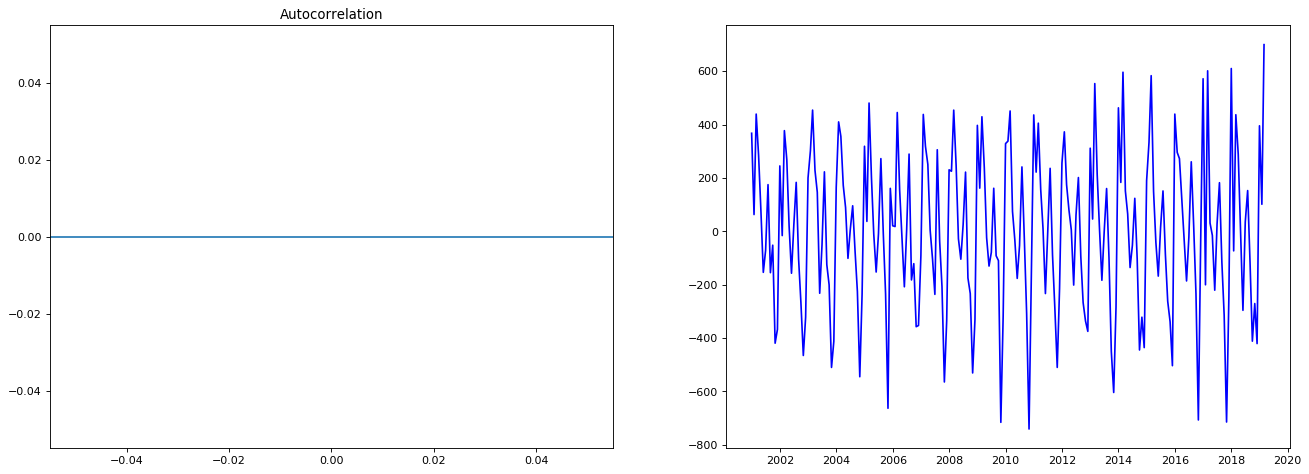

In [22]:
# CHECKING TIME SERIES STATIONARITY

# Original Series
list_consump = df_demand["Consumption(Bscf)"].tolist()
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
plot_acf(list_consump,lags=50, ax=axes[0])
plt.plot(df_demand.index,df_demand["Consumption(Bscf)"],c="b")

# # 1st Differencing
list_consump = df_demand["Consumption(Bscf)"].diff().tolist()
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
plot_acf(list_consump,lags=50, ax=axes[0])
plt.plot(df_demand.index,df_demand["Consumption(Bscf)"].diff(),c="b")


# Original Series
# fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
# plt.plot(df_demand.index,df_demand["Consumption(Bscf)"]); 
# # axes[0, 0].plot(df_demand["Consumption(Bscf)"]); 
# # axes[0, 0].set_title('Original Series')
# plot_acf(df_demand["Consumption(Bscf)"].tolist(),lags=50, ax=axes[1])

# # 1st Differencing
# axes[1, 0].plot(df_demand["Consumption(Bscf)"].diff()); axes[1, 0].set_title('1st Order Differencing')
# plot_acf(df_demand["Consumption(Bscf)"].diff().dropna(), ax=axes[1, 1])

- The autocorrelation turns negative after few lags (~2) (ACF turns to zero too quickly) and only one differencing turn the autocorrelation to zero , so no diffferenciation might be acceptable:   d = 1 or d =0

In [23]:
# CALCULATING THE NUMBER OF DIFFERNCES
from pmdarima.arima.utils import ndiffs

data = df_demand["Consumption(Bscf)"]

## Adf Test
print(f"Number of differencing using Adf Test for ARIMA: {ndiffs(data, test='adf')}")

# KPSS test
print(f"Number of differencing using KPSS Test for ARIMA: {ndiffs(data, test='kpss')}")

# PP test:
print(f"Number of differencing using pp Test for ARIMA: {ndiffs(data, test='pp')}")

Number of differencing using Adf Test for ARIMA: 0
Number of differencing using KPSS Test for ARIMA: 1
Number of differencing using pp Test for ARIMA: 0


Partial autocorrelation can be imagined as the correlation between the series and its lag, after excluding the contributions from the intermediate lags. So, PACF sort of conveys the pure correlation between a lag and the series. That way, you will know if that lag is needed in the AR term or not.

- The partial autocorrelation (PACF) gives a hint about p

Just like how we looked at the PACF plot for the number of AR terms, you can look at the ACF plot for the number of MA terms. An MA term is technically, the error of the lagged forecast. The ACF tells how many MA terms are required to remove any autocorrelation in the stationarized series.

- ACF gives a hint about q

C:\Users\Asterion\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


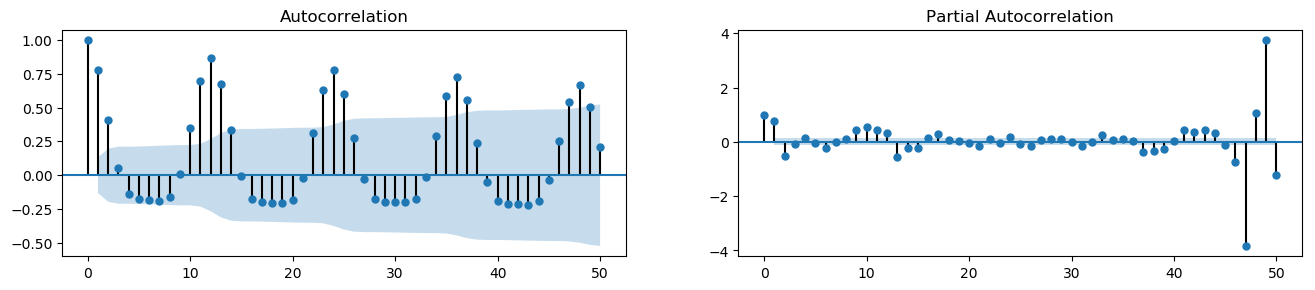

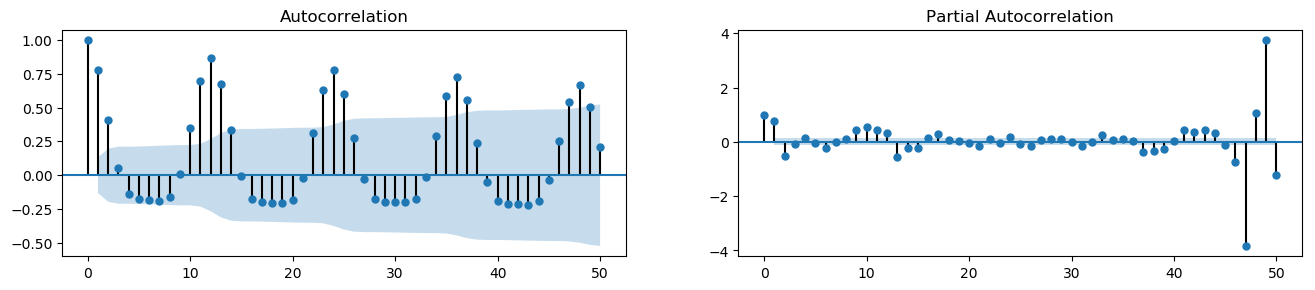

In [24]:
list_consump = df_demand["Consumption(Bscf)"].tolist()
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(list_consump, lags=50, ax=axes[0])
plot_pacf(list_consump, lags=50, ax=axes[1])

- From the PACF, we notice that lag-1 (about significant line) and has the strongest correlation:   p = 1
- Couple of lags are above the the significance line: q = 2 (tentatively)

In [25]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
# data = residual["Consumption(Bscf)"]
data = df_demand["Consumption(Bscf)"]

model = ARIMA(data, order=(1,0,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\Asterion\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  % freq, ValueWarning)
C:\Users\Asterion\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


                              ARMA Model Results                              
Dep. Variable:      Consumption(Bscf)   No. Observations:                  220
Model:                     ARMA(1, 2)   Log Likelihood               -1513.578
Method:                       css-mle   S.D. of innovations            234.458
Date:                Tue, 30 Jul 2019   AIC                           3037.157
Time:                        18:31:34   BIC                           3054.125
Sample:                    04-01-2019   HQIC                          3044.009
                         - 01-01-2001                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2063.7505     65.233     31.636      0.000    1935.895    2191.606
ar.L1.Consumption(Bscf)     0.5056      0.076      6.640      0.000       0.356       0.655


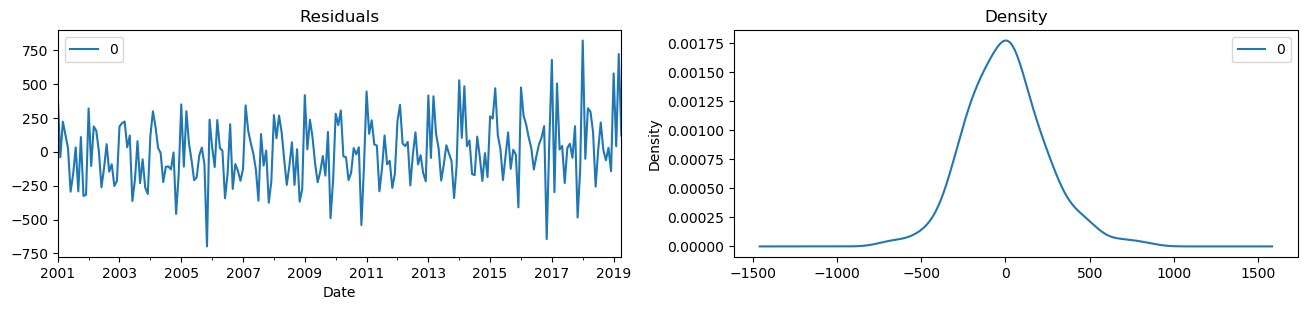

In [26]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2,figsize=(16,3), dpi= 100)
# fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

C:\Users\Asterion\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


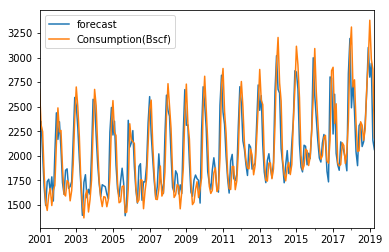

In [27]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [28]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

data = df_demand["Consumption(Bscf)"]

model = pm.auto_arima(data, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Fit ARIMA: order=(1, 0, 1); AIC=3058.687, BIC=3072.262, Fit time=0.138 seconds
Fit ARIMA: order=(0, 0, 0); AIC=3308.495, BIC=3315.283, Fit time=0.002 seconds
Fit ARIMA: order=(1, 0, 0); AIC=3102.096, BIC=3112.277, Fit time=0.043 seconds
Fit ARIMA: order=(0, 0, 1); AIC=3137.568, BIC=3147.749, Fit time=0.101 seconds
Fit ARIMA: order=(2, 0, 1); AIC=3032.207, BIC=3049.175, Fit time=0.259 seconds
Fit ARIMA: order=(2, 0, 0); AIC=3031.317, BIC=3044.891, Fit time=0.087 seconds
Fit ARIMA: order=(3, 0, 1); AIC=3032.596, BIC=3052.957, Fit time=0.195 seconds
Fit ARIMA: order=(3, 0, 0); AIC=3031.755, BIC=3048.723, Fit time=0.095 seconds
Total fit time: 0.927 seconds
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  220
Model:                     ARMA(2, 0)   Log Likelihood               -1511.658
Method:                       css-mle   S.D. of innovations            232.410
Date:                T

C:\Users\Asterion\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


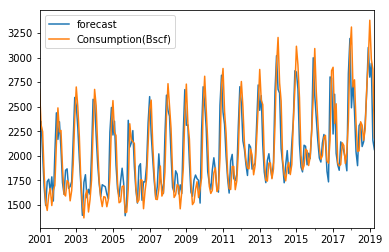

In [29]:
# Actual vs Fitted
# fig, ax = plt.subplots(1,2,figsize=(16,3), dpi= 100)
model_fit.plot_predict(dynamic=False)
plt.show()

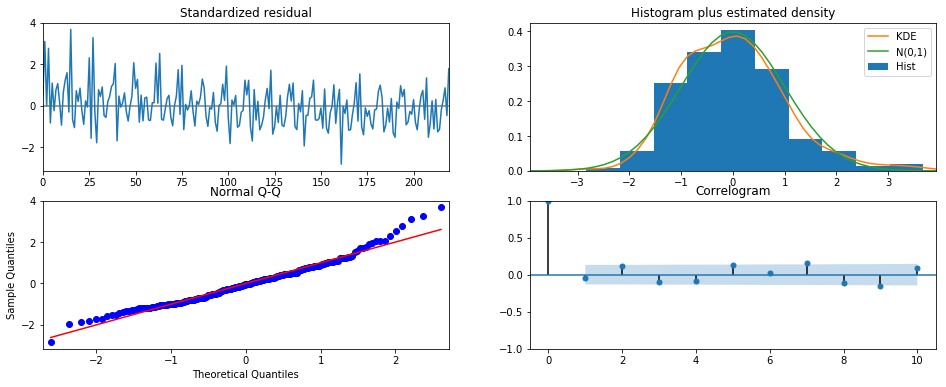

In [30]:
model.plot_diagnostics(figsize=(16,6))
plt.show()

So how to interpret the plot diagnostics?

- Top left: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.

- Top Right: The density plot suggest normal distribution with mean zero.

- Bottom left: All the dots should fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed.

- Bottom Right: The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual errors which are not explained in the model. So you will need to look for more X’s (predictors) to the model.

C:\Users\Asterion\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Asterion\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


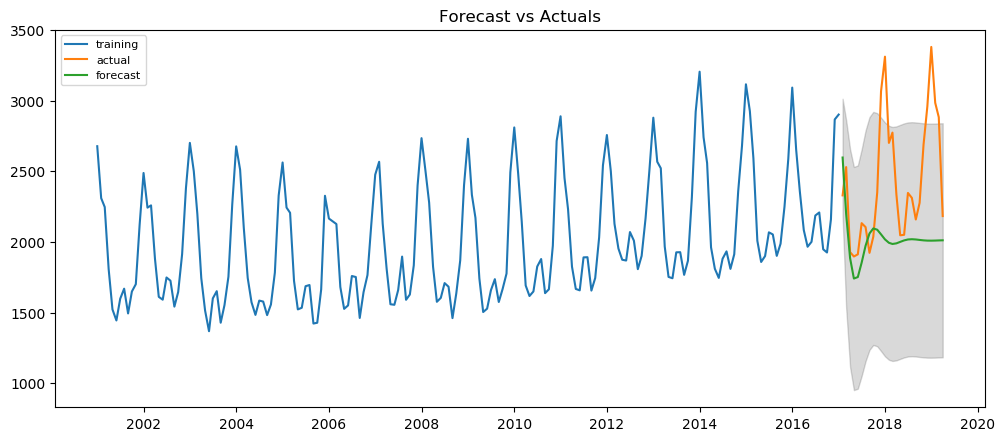

In [31]:
# Create Training and Test
dff = df_demand.sort_index(ascending=1)
# train = dff["Consumption(Bscf)"][:200]
# test = dff["Consumption(Bscf)"][200:]

NumSta2For = 27

train = dff["Consumption(Bscf)"][:len(dff)-NumSta2For]
test = dff["Consumption(Bscf)"][len(dff)-NumSta2For:]

# Build Model
model = ARIMA(train, order=(2, 0, 0))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(NumSta2For, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

Let’s build the SARIMA model using pmdarima‘s auto_arima(). To do that, you need to set seasonal=True, set the frequency m=12 for month wise series and enforce D=1.

In [32]:
# Seasonal - fit stepwise auto-ARIMA
data = train
smodel = pm.auto_arima(data, 
                         start_p=1, start_q=1,
                         test='adf', # use adftest to find optimal 'd'
                         max_p=3, max_q=3, # maximum p and q
                         m=12, # frequency of series
                         d=None, # let model determine 'd'
                         seasonal=True, # Seasonality
                         start_P=0,
                         D=1, 
                         trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=2200.078, BIC=2216.070, Fit time=0.705 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=2285.759, BIC=2292.156, Fit time=0.043 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 12); AIC=2237.544, BIC=2250.337, Fit time=0.551 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=2215.949, BIC=2228.743, Fit time=0.583 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 1, 12); AIC=2198.241, BIC=2217.432, Fit time=1.018 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 0, 12); AIC=2239.533, BIC=2255.525, Fit time=0.506 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 2, 12); AIC=2197.481, BIC=2219.870, Fit time=5.126 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(1, 1, 2, 12); AIC=2206.710, BIC=2225.901, Fit time=2.758 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(1, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 0) seasonal_orde

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  193
Model:             SARIMAX(1, 0, 0)x(0, 1, 2, 12)   Log Likelihood               -1092.581
Date:                            Tue, 30 Jul 2019   AIC                           2195.161
Time:                                    18:32:00   BIC                           2211.154
Sample:                                         0   HQIC                          2201.645
                                            - 193                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     15.0221      2.979      5.043      0.000       9.183      20.861
ar.L1          0.5227      0.070      7.465      0.000       0.385       0.660
ma.S.L12      -0.7496      1.234     -0.607      0.544      -3.168       1.669
ma.S.L24      -0.2428      0.364     -0.668      0.504      -0.955       0.470
sigma2      8815.4108   1.11e+04      0.793      0.428    -1.3e+04    3.06e+04
===================================================================================
Ljung-Box (Q):                       55.06   Jarque-Bera (JB):                48.42
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                            -0.47
Prob(H) (two-sided):                  0.78   Kurtosis:                         5.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

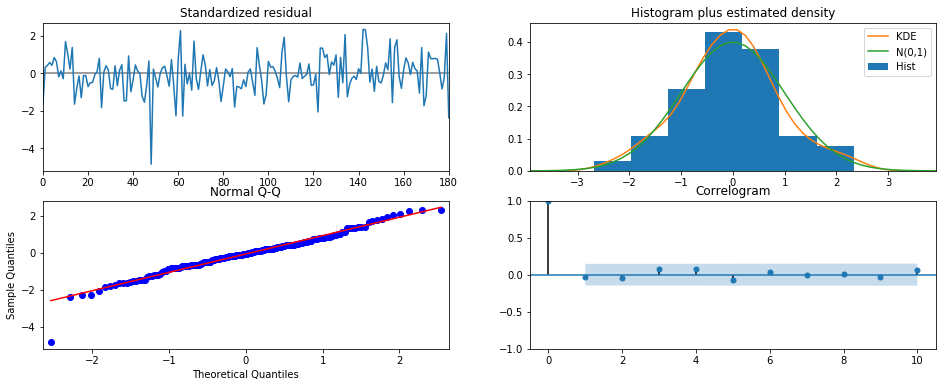

In [33]:
smodel.plot_diagnostics(figsize=(16,6))
plt.show()

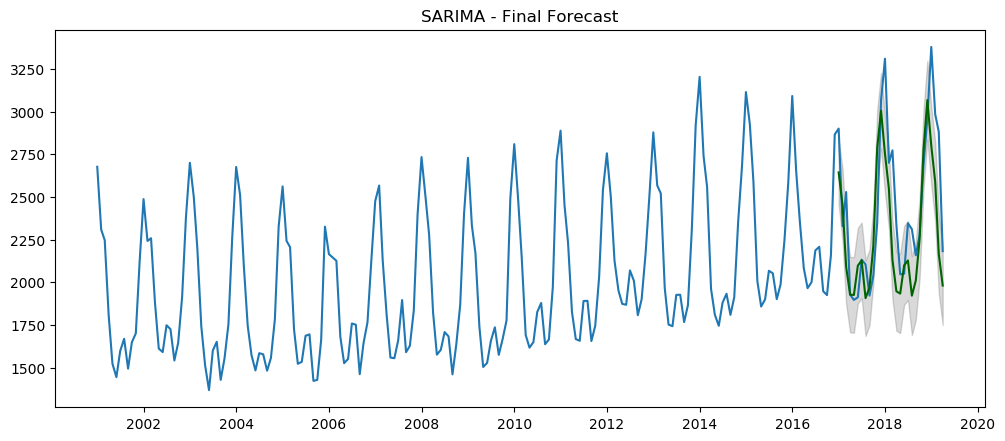

In [34]:
# Forecast
n_periods = NumSta2For + 1
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(train.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
# plt.plot(data)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(dff["Consumption(Bscf)"])
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast")
plt.show()

In [35]:
df_fitser = pd.DataFrame(fitted_series)
df_fitser.reset_index(inplace = True)
df_fitser.columns = ["Date","ForCon"]
df_fitser = df_fitser.set_index(["Date"])
df_fitser.to_csv("../../Data/CSV_Files/SARIMA.csv", encoding='utf-8')
df_fitser

,ForCon
Date,
2017-01-01,2644.082379
2017-02-01,2450.472684
2017-03-01,2090.372702
2017-04-01,1927.879259
2017-05-01,1925.916720
2017-06-01,2097.524989
2017-07-01,2128.603574
2017-08-01,1907.284394
2017-09-01,1969.998261


In [36]:
data

Date
2001-01-01    2676.998
2001-02-01    2309.464
2001-03-01    2246.633
2001-04-01    1807.170
2001-05-01    1522.382
2001-06-01    1444.378
2001-07-01    1598.071
2001-08-01    1669.178
2001-09-01    1494.128
2001-10-01    1649.073
2001-11-01    1700.950
2001-12-01    2120.198
2002-01-01    2487.638
2002-02-01    2242.427
2002-03-01    2258.431
2002-04-01    1880.985
2002-05-01    1611.453
2002-06-01    1591.373
2002-07-01    1748.435
2002-08-01    1725.712
2002-09-01    1542.170
2002-10-01    1645.873
2002-11-01    1913.629
2002-12-01    2378.895
2003-01-01    2700.545
2003-02-01    2500.315
2003-03-01    2197.936
2003-04-01    1743.530
2003-05-01    1514.697
2003-06-01    1368.369
                ...   
2014-08-01    1933.061
2014-09-01    1809.291
2014-10-01    1912.810
2014-11-01    2357.521
2014-12-01    2679.165
2015-01-01    3114.982
2015-02-01    2925.172
2015-03-01    2591.329
2015-04-01    2007.922
2015-05-01    1858.149
2015-06-01    1899.906
2015-07-01    2067.714
2015-0

In [37]:
df_price_train

Date
2001-01-01    8.172857
2001-02-01    5.606316
2001-03-01    5.230455
2001-04-01    5.192000
2001-05-01    4.191364
2001-06-01    3.720476
2001-07-01    3.109048
2001-08-01    2.967826
2001-09-01    2.191579
2001-10-01    2.460870
2001-11-01    2.342500
2001-12-01    2.302105
2002-01-01    2.317619
2002-02-01    2.323684
2002-03-01    3.028500
2002-04-01    3.426818
2002-05-01    3.498182
2002-06-01    3.261500
2002-07-01    2.987143
2002-08-01    3.087727
2002-09-01    3.549000
2002-10-01    4.126522
2002-11-01    4.043158
2002-12-01    4.740952
2003-01-01    5.432381
2003-02-01    7.707895
2003-03-01    5.933333
2003-04-01    5.263333
2003-05-01    5.813810
2003-06-01    5.818571
                ...   
2015-03-01    2.830909
2015-04-01    2.609048
2015-05-01    2.850000
2015-06-01    2.783636
2015-07-01    2.839565
2015-08-01    2.773810
2015-09-01    2.660909
2015-10-01    2.340909
2015-11-01    2.092381
2015-12-01    1.929565
2016-01-01    2.282381
2016-02-01    1.989048
2016-0

In [38]:
dff_train = pd.merge(data,df_price_train, how='left', left_index=True, right_index=True)
dff_train

,Consumption(Bscf),Price_HH
Date,,
2001-01-01,2676.998,8.172857
2001-02-01,2309.464,5.606316
2001-03-01,2246.633,5.230455
2001-04-01,1807.170,5.192000
2001-05-01,1522.382,4.191364
2001-06-01,1444.378,3.720476
2001-07-01,1598.071,3.109048
2001-08-01,1669.178,2.967826
2001-09-01,1494.128,2.191579


In [39]:
# Seasonal - fit stepwise auto-ARIMA
data = dff_train[["Consumption(Bscf)"]]
smodel = pm.auto_arima(dff_train[["Consumption(Bscf)"]], exogenous=dff_train[["Price_HH"]], 
                         start_p=1, start_q=1,
                         test='adf', # use adftest to find optimal 'd'
                         max_p=3, max_q=3, # maximum p and q
                         m=12, # frequency of series
                         d=None, # let model determine 'd'
                         seasonal=True, # Seasonality
                         start_P=0,
                         D=1, 
                         trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=2198.944, BIC=2218.135, Fit time=1.021 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=2287.349, BIC=2296.945, Fit time=0.031 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 12); AIC=2235.484, BIC=2251.477, Fit time=0.720 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=2217.184, BIC=2233.176, Fit time=1.195 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 1, 12); AIC=2197.712, BIC=2220.102, Fit time=1.660 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 0, 12); AIC=2237.305, BIC=2256.496, Fit time=1.216 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 2, 12); AIC=2196.658, BIC=2222.246, Fit time=4.242 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(1, 1, 2, 12); AIC=2208.698, BIC=2231.088, Fit time=4.183 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(1, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 0) seasonal_orde

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  193
Model:             SARIMAX(1, 0, 0)x(0, 1, 2, 12)   Log Likelihood               -1091.707
Date:                            Tue, 30 Jul 2019   AIC                           2195.415
Time:                                    18:32:35   BIC                           2214.606
Sample:                                         0   HQIC                          2203.195
                                            - 193                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.9145      2.833      4.912      0.000       8.363      19.466
x1            10.8127      5.943      1.819      0.069      -0.836      22.461
ar.L1          0.5865      0.064      9.181      0.000       0.461       0.712
ma.S.L12      -0.7474      1.778     -0.420      0.674      -4.232       2.737
ma.S.L24      -0.2473      0.501     -0.494      0.621      -1.228       0.734
sigma2      8732.7002   1.58e+04      0.553      0.580   -2.22e+04    3.97e+04
===================================================================================
Ljung-Box (Q):                       61.09   Jarque-Bera (JB):                36.73
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               1.10   Skew:                            -0.45
Prob(H) (two-sided):                  0.72   Kurtosis:                         5.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

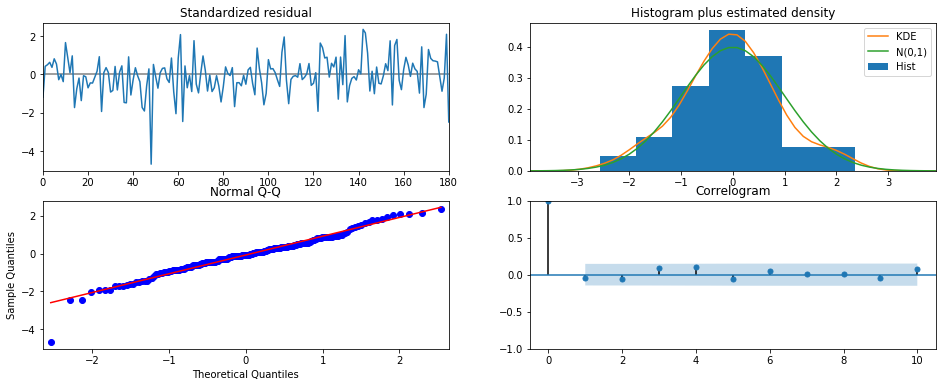

In [40]:
smodel.plot_diagnostics(figsize=(16,6))
plt.show()

In [44]:
# Forecast
n_periods = NumSta2For + 1
fitted, confint = smodel.predict(n_periods=n_periods, 
                                 exogenous=np.tile(df_price_test.values,1).reshape(-1,1),
                                 return_conf_int=True)
index_of_fc = pd.date_range(train.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
# plt.plot(data)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(dff["Consumption(Bscf)"])
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast")
plt.show()

ValueError: Exogenous array dims (n_rows) != n_periods

In [ ]:
np.tile(df_price_test,2).reshape(-1,1)

In [ ]:
df_price_test.values